In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
import itertools

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv('DEXJPUS.csv')
df.head()

,DATE,DEXJPUS
0,2016-01-15,116.7800
1,2016-01-18,.
2,2016-01-19,117.6600
3,2016-01-20,116.3800
4,2016-01-21,117.6100


In [6]:
df.shape

(1306, 2)

In [7]:
df.isnull().sum()

DATE       0
DEXJPUS    0
dtype: int64

In [8]:
df.dtypes

DATE       object
DEXJPUS    object
dtype: object

There are only a few entries that do not contain numerical values. After dropping those indices, the entire column can be converted using `pd.to_numeric`.

In [9]:
drop_index = df.loc[df['DEXJPUS'] == "."].index
df.drop(drop_index, inplace=True)
df.head()

,DATE,DEXJPUS
0,2016-01-15,116.7800
2,2016-01-19,117.6600
3,2016-01-20,116.3800
4,2016-01-21,117.6100
5,2016-01-22,118.3700


In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DEXJPUS'] = pd.to_numeric(df['DEXJPUS'])
df.dtypes

DATE       datetime64[ns]
DEXJPUS           float64
dtype: object

Now that the columns are in the proper time series format, we can change the index to `'DATE'` to make visualizing the data a little easier.

In [11]:
df.set_index('DATE', inplace=True)
df.index

DatetimeIndex(['2016-01-15', '2016-01-19', '2016-01-20', '2016-01-21',
               '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-27',
               '2016-01-28', '2016-01-29',
               ...
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', name='DATE', length=1249, freq=None)

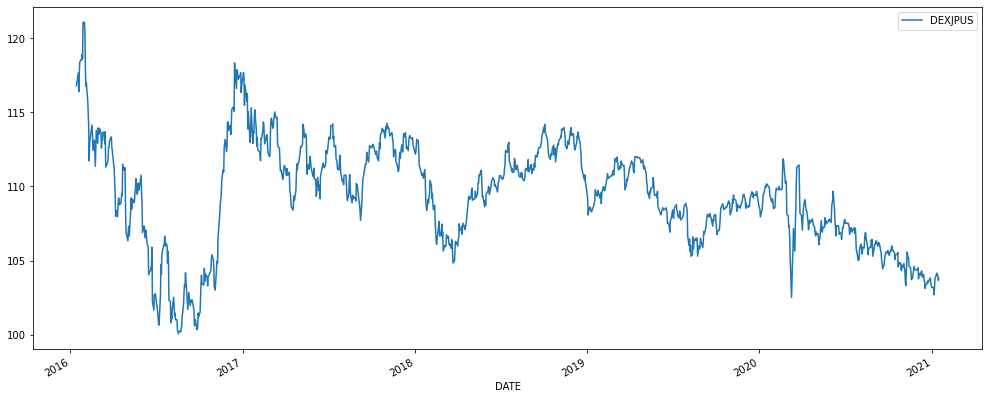

In [12]:
df.plot(figsize=(17,7));

In [13]:
def stationarity_check(ts, window=8):
    roll_mean = ts.rolling(window=window, center=False).mean()
    roll_std = ts.rolling(window=window, center=False).std()
    
    fig = plt.figure(figsize=(12,7))
    plt.plot(ts, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.show()
    
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic', 
                                'p-value', 
                                '#Lags Used', 
                                'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print('Results of Dickey-Fuller test: \n')
    return dfoutput

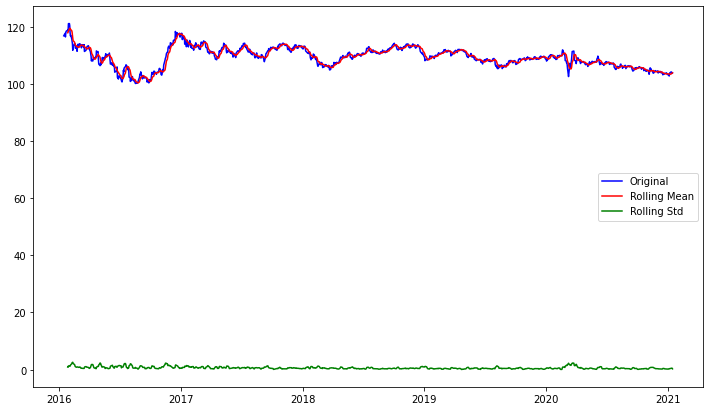

Results of Dickey-Fuller test: 



Test Statistic                   -3.027974
p-value                           0.032363
#Lags Used                       14.000000
Number of Observations Used    1234.000000
Critical Value (1%)              -3.435660
Critical Value (5%)              -2.863885
Critical Value (10%)             -2.568019
dtype: float64

In [14]:
stationarity_check(df)

The variation in the rolling standard deviation is relatively small. However, the rolling mean fluctuates with the original values. The series will need to be transformed in order to create a more stationary dataset.

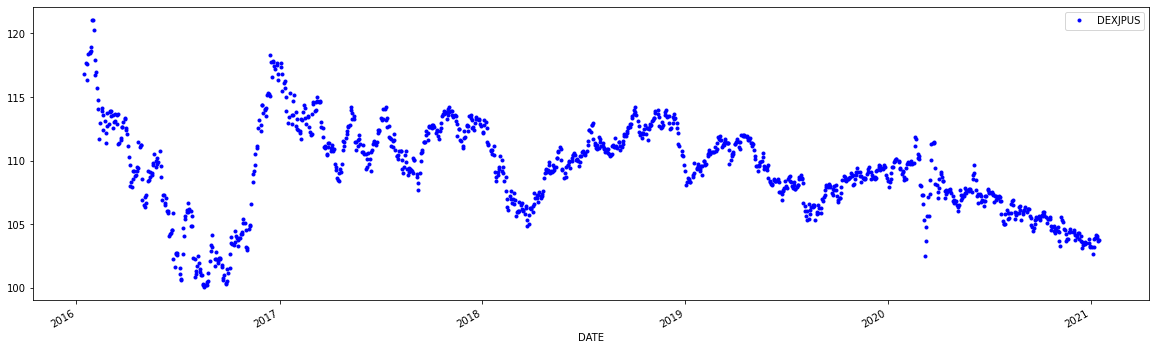

In [15]:
df.plot(figsize=(20,6), style=".b");

In [16]:
year_groups = df.groupby(pd.Grouper(freq='A'))

In [17]:
year_groups

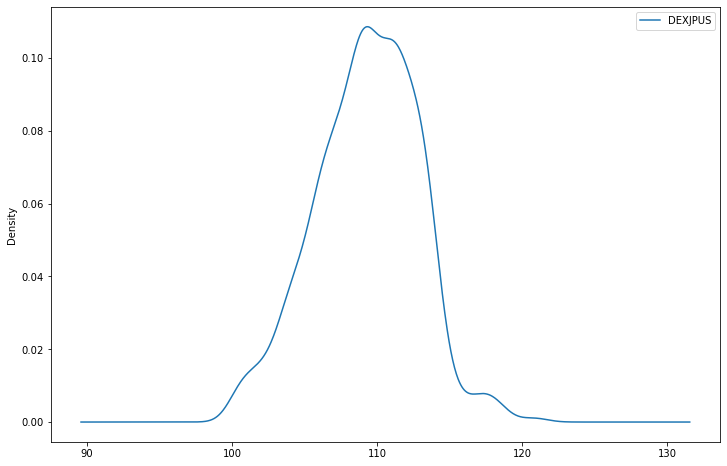

In [20]:
df.plot(kind='kde', figsize=(12,8));

In [21]:
wk_avg = df.resample('W').mean()

In [23]:
year_groups = wk_avg.groupby(pd.Grouper(freq='A'))
weekly_avg = pd.DataFrame()
for yr, group in year_groups:
    weekly_avg[yr.year] = group.values.ravel()

# Plot the yearly groups as subplots
weekly_avg.plot(figsize=(20,16), subplots=True, legend=True);

ValueError: Length of values (53) does not match length of index (50)

In [25]:
df = pd.read_csv('DEXJPUS.csv')
df.head()

,DATE,DEXJPUS
0,2016-01-15,116.7800
1,2016-01-18,.
2,2016-01-19,117.6600
3,2016-01-20,116.3800
4,2016-01-21,117.6100


In [26]:
df['DEXJPUS'] = pd.to_numeric(df['DEXJPUS'], errors='coerce')

In [27]:
df.isnull().sum()

DATE        0
DEXJPUS    57
dtype: int64

In [28]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [29]:
df.head()

,DEXJPUS
DATE,
2016-01-15,116.78
2016-01-18,NaN
2016-01-19,117.66
2016-01-20,116.38
2016-01-21,117.61


In [30]:
df.dtypes

DEXJPUS    float64
dtype: object

In [31]:
mean_fill = df.fillna(df.mean())

In [32]:
wk_avg = mean_fill.resample('W')
wk_avg

In [33]:
len(wk_avg)

262

In [34]:
y = mean_fill.resample('MS').mean()
y

,DEXJPUS
DATE,
2016-01-01,117.426059
2016-02-01,114.361269
2016-03-01,112.931739
2016-04-01,109.551905
2016-05-01,108.867575
...,...
2020-09-01,105.756666
2020-10-01,105.394393
2020-11-01,105.101903


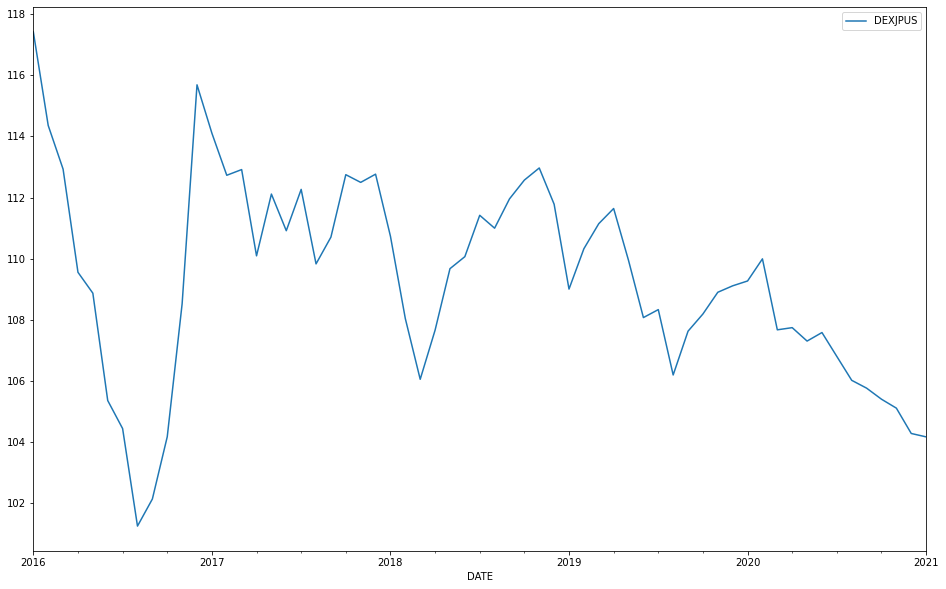

In [35]:
y.plot(figsize=(16,10));

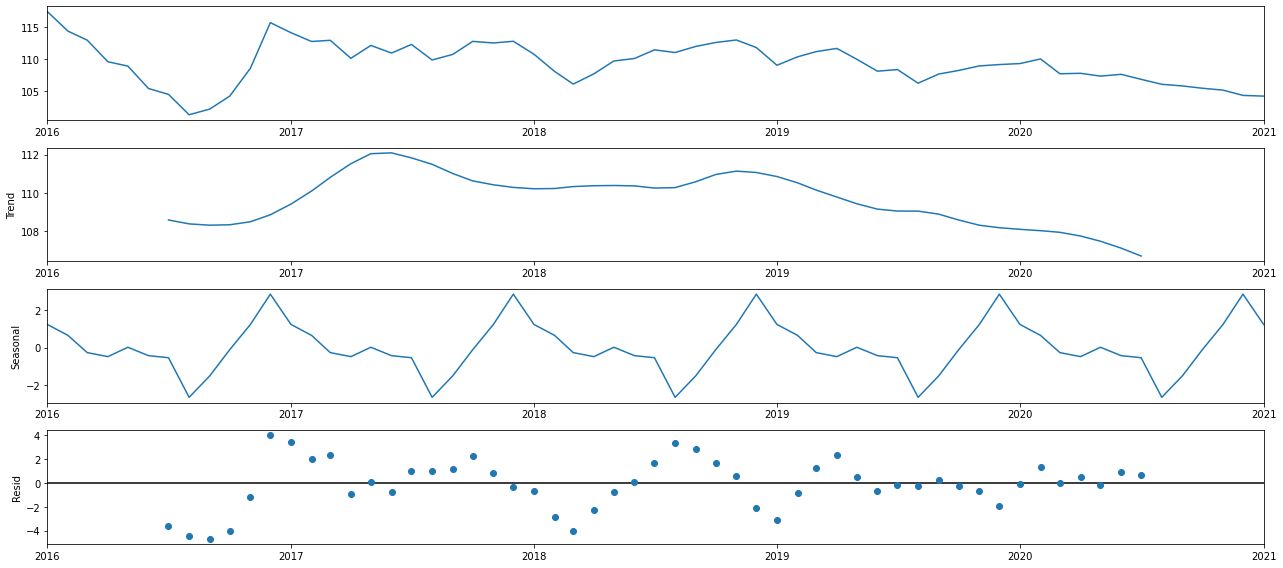

In [36]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
y

,DEXJPUS
DATE,
2016-01-01,117.426059
2016-02-01,114.361269
2016-03-01,112.931739
2016-04-01,109.551905
2016-05-01,108.867575
...,...
2020-09-01,105.756666
2020-10-01,105.394393
2020-11-01,105.101903


In [38]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

aics = set()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aics.add((param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:735.4722049285318
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:552.2846353674234
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:267.55131019168607
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:187.8839611588491
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:273.484050113091
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:268.27502886916454
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:193.04046932894596
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:189.7940520600675
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:648.6021543912043
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:502.7695229975895
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:222.18153541965404
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:155.71999342375938
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:276.5589719738127
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:224.80502525364267
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:168.70529170025085
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:159.94003401141742
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:242.46207141024593
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:165.6561439639683
AR

In [40]:
aics

{((0, 0, 0), (0, 0, 0, 12), 735.4722049285318),
 ((0, 0, 0), (0, 0, 1, 12), 552.2846353674234),
 ((0, 0, 0), (0, 1, 0, 12), 267.55131019168607),
 ((0, 0, 0), (0, 1, 1, 12), 187.8839611588491),
 ((0, 0, 0), (1, 0, 0, 12), 273.484050113091),
 ((0, 0, 0), (1, 0, 1, 12), 268.27502886916454),
 ((0, 0, 0), (1, 1, 0, 12), 193.04046932894596),
 ((0, 0, 0), (1, 1, 1, 12), 189.7940520600675),
 ((0, 0, 1), (0, 0, 0, 12), 648.6021543912043),
 ((0, 0, 1), (0, 0, 1, 12), 502.7695229975895),
 ((0, 0, 1), (0, 1, 0, 12), 222.18153541965404),
 ((0, 0, 1), (0, 1, 1, 12), 155.71999342375938),
 ((0, 0, 1), (1, 0, 0, 12), 276.5589719738127),
 ((0, 0, 1), (1, 0, 1, 12), 224.80502525364267),
 ((0, 0, 1), (1, 1, 0, 12), 168.70529170025085),
 ((0, 0, 1), (1, 1, 1, 12), 159.94003401141742),
 ((0, 1, 0), (0, 0, 0, 12), 242.46207141024593),
 ((0, 1, 0), (0, 0, 1, 12), 165.6561439639683),
 ((0, 1, 0), (0, 1, 0, 12), 206.4260400176935),
 ((0, 1, 0), (0, 1, 1, 12), 1072.997645008798),
 ((0, 1, 0), (1, 0, 0, 12), 165.

In [41]:
sorted_aics = sorted(aics, key=lambda x: x[2])
sorted_aics[0], sorted_aics[-1]

(((1, 0, 1), (1, 1, 1, 12), 144.28508457701304),
 ((1, 1, 0), (1, 1, 1, 12), 1485.1800781763118))

In [42]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7510      0.141      5.339      0.000       0.475       1.027
ma.L1          0.3013      0.270      1.117      0.264      -0.227       0.830
ar.S.L12      -0.2403      0.187     -1.288      0.198      -0.606       0.125
ma.S.L12      51.6809    986.567      0.052      0.958   -1881.955    1985.316
sigma2         0.0010      0.039      0.026      0.979      -0.075       0.077


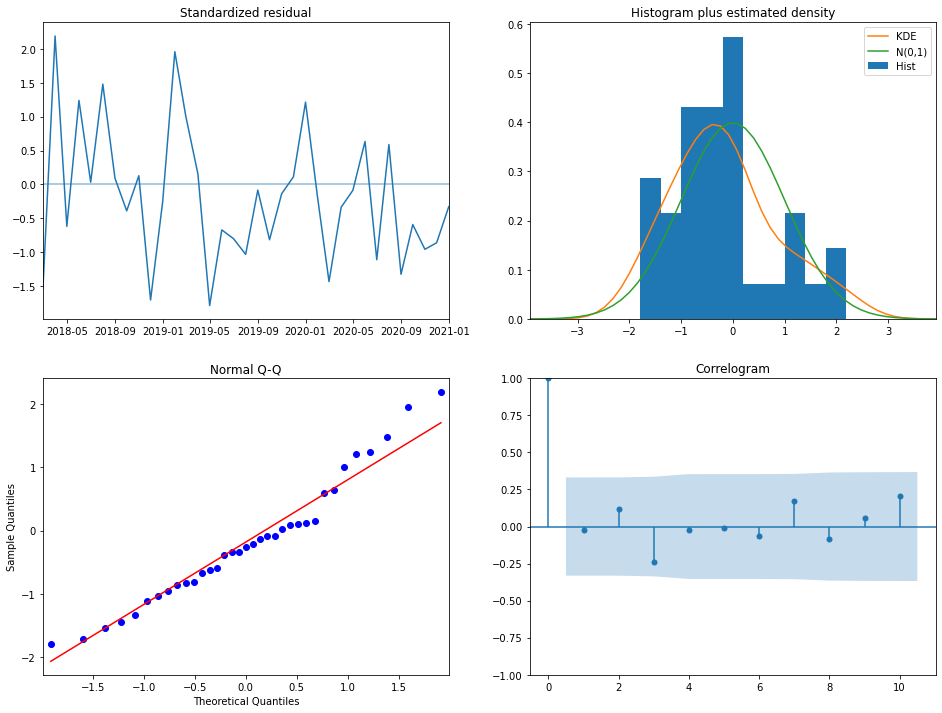

In [43]:
results.plot_diagnostics(figsize=(16,12));

In [44]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

quarterly_aics = set()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            quarterly_aics.add((param, param_seasonal, results.aic))
        except:
            continue
            
sorted_quarterly = sorted(quarterly_aics, key=lambda x: x[2])
sorted_quarterly[0], sorted_quarterly[-1]

(((1, 1, 1), (0, 0, 1, 4), 207.94218972383118),
 ((0, 0, 0), (0, 0, 0, 4), 735.4722049285318))

In [45]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8611      0.092     -9.314      0.000      -1.042      -0.680
ma.L1          1.0000   2396.940      0.000      1.000   -4696.916    4698.916
ma.S.L4       -0.6167      0.174     -3.538      0.000      -0.958      -0.275
sigma2         2.1020   5038.011      0.000      1.000   -9872.218    9876.422


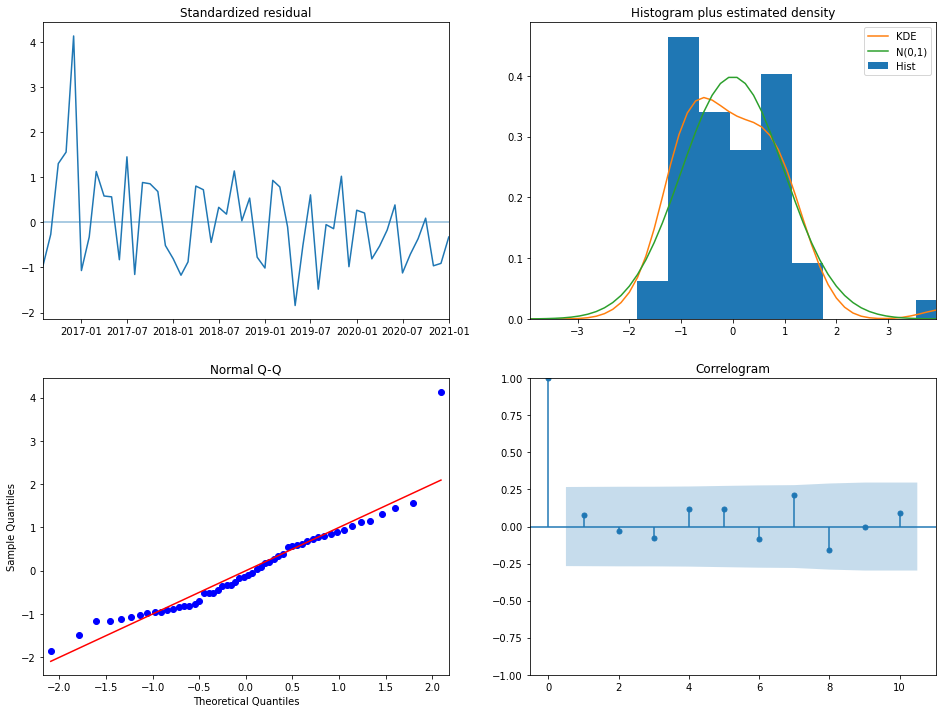

In [46]:
results.plot_diagnostics(figsize=(16,12));

In [47]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

quarterly_aics = set()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            quarterly_aics.add((param, param_seasonal, results.aic))
        except:
            continue
            
sorted_quarterly = sorted(quarterly_aics, key=lambda x: x[2])
sorted_quarterly[0], sorted_quarterly[-1]

(((0, 0, 2), (0, 2, 2, 4), 154.94913104939664),
 ((0, 0, 0), (0, 0, 0, 4), 735.4722049285318))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2430      0.051     24.332      0.000       1.143       1.343
ma.L2          1.1297      0.072     15.774      0.000       0.989       1.270
ma.S.L4       -1.8011   1204.217     -0.001      0.999   -2362.023    2358.421
ma.S.L8        1.0001   1337.197      0.001      0.999   -2619.859    2621.859
sigma2         1.1095   1483.755      0.001      0.999   -2906.997    2909.216


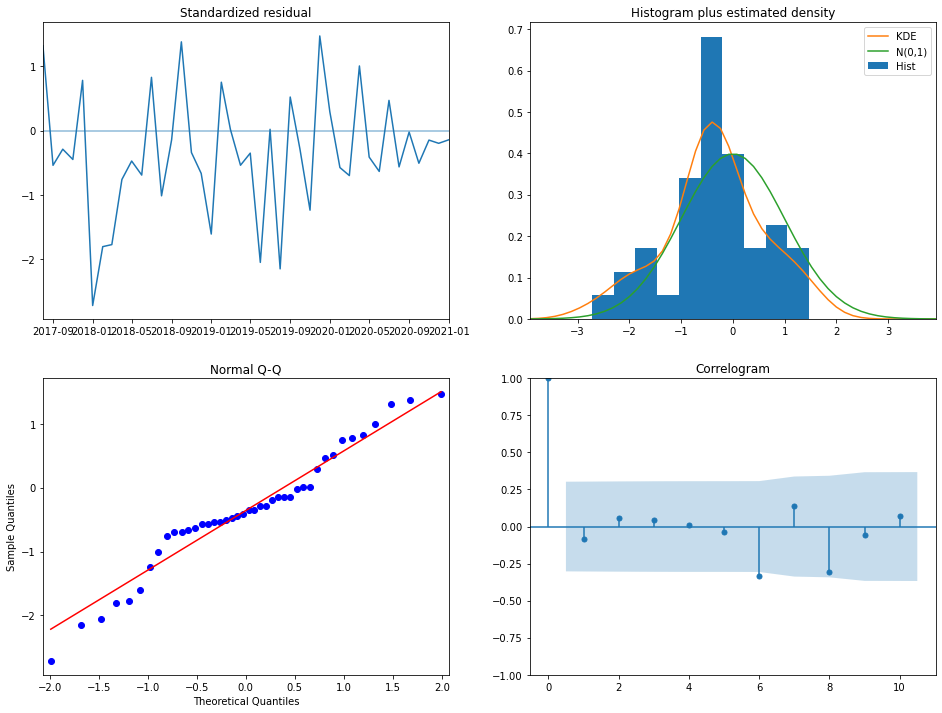

In [49]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=sorted_quarterly[0][0],
                                seasonal_order=sorted_quarterly[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16,12));

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

yearly_aics = set()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            yearly_aics.add((param, param_seasonal, results.aic))
        except:
            continue
            
sorted_yearly = sorted(yearly_aics, key=lambda x: x[2])

mod = sm.tsa.statespace.SARIMAX(y,
                                order=sorted_yearly[0][0],
                                seasonal_order=sorted_yearly[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16,12));

In [50]:
y

,DEXJPUS
DATE,
2016-01-01,117.426059
2016-02-01,114.361269
2016-03-01,112.931739
2016-04-01,109.551905
2016-05-01,108.867575
...,...
2020-09-01,105.756666
2020-10-01,105.394393
2020-11-01,105.101903


In [57]:
y.describe()

,DEXJPUS
count,61.000000
mean,109.307147
std,3.288892
min,101.238261
25%,107.578182
50%,109.551905
75%,111.781903
max,117.426059


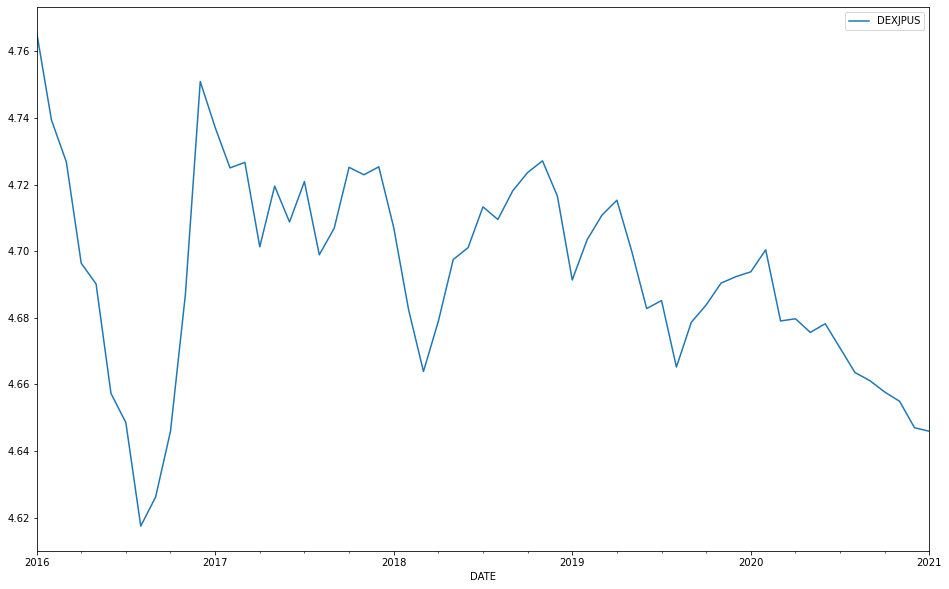

In [51]:
log_y = np.log(y)
log_y.plot(figsize=(16,10));

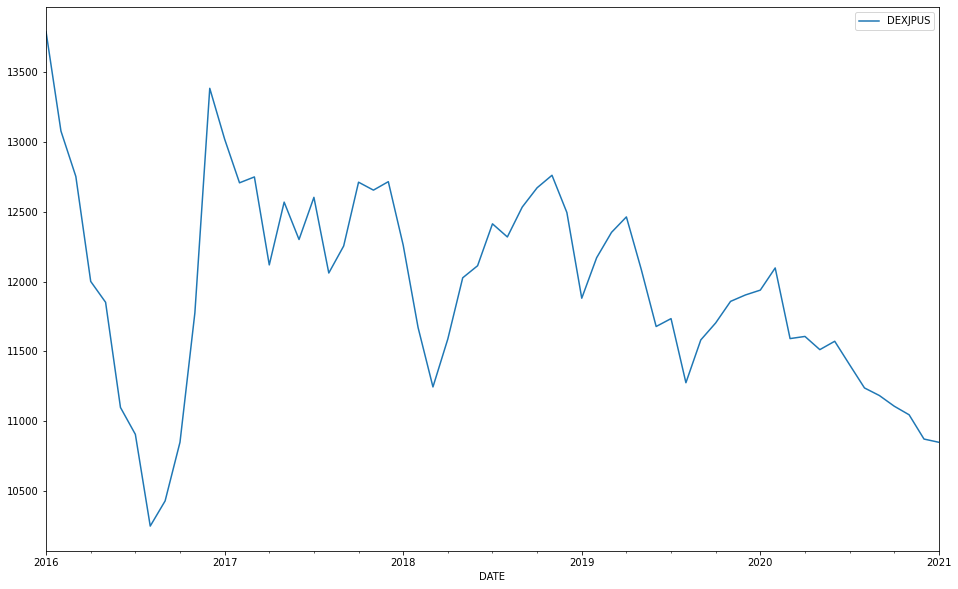

In [52]:
sq_y = y**2
sq_y.plot(figsize=(16,10));

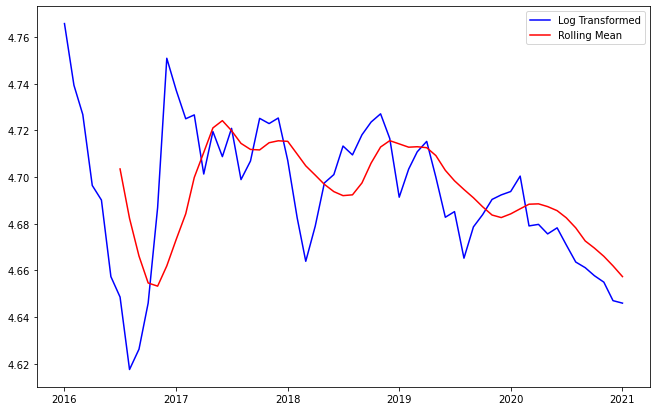

In [53]:
roll_mean = log_y.rolling(window=7, center=False).mean()
fig = plt.figure(figsize=(11,7)) 
plt.plot(log_y, color='blue', label='Log Transformed')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.show()

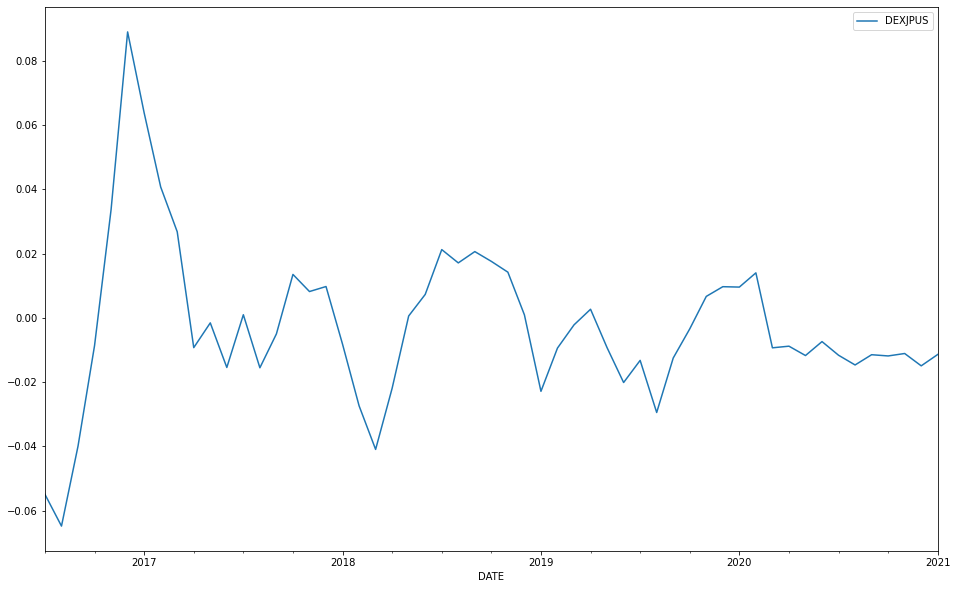

In [54]:
yLogRollMean = log_y - roll_mean
yLogRollMean.dropna(inplace=True)
yLogRollMean.plot(figsize=(16,10));

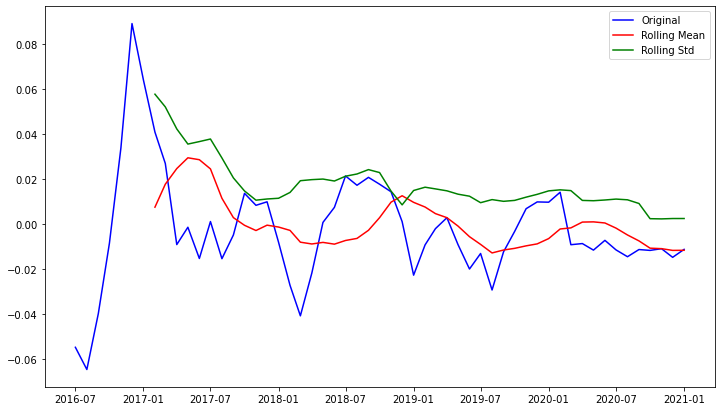

Results of Dickey-Fuller test: 



Test Statistic                 -3.576975
p-value                         0.006217
#Lags Used                     10.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

In [59]:
stationarity_check(yLogRollMean)

In [60]:
exp_roll_mean = log_y.ewm(halflife=4).mean()

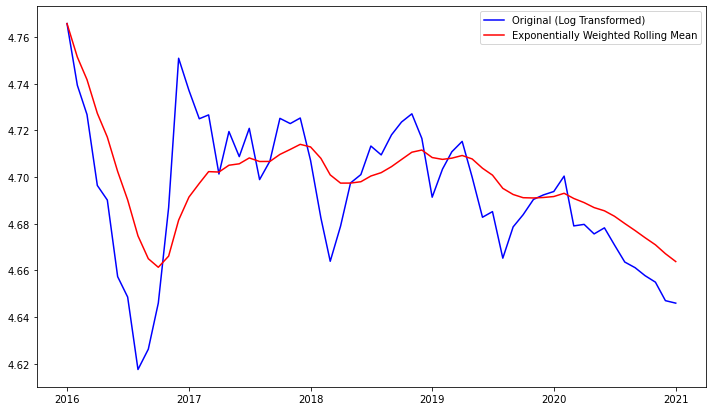

In [61]:
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(y), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

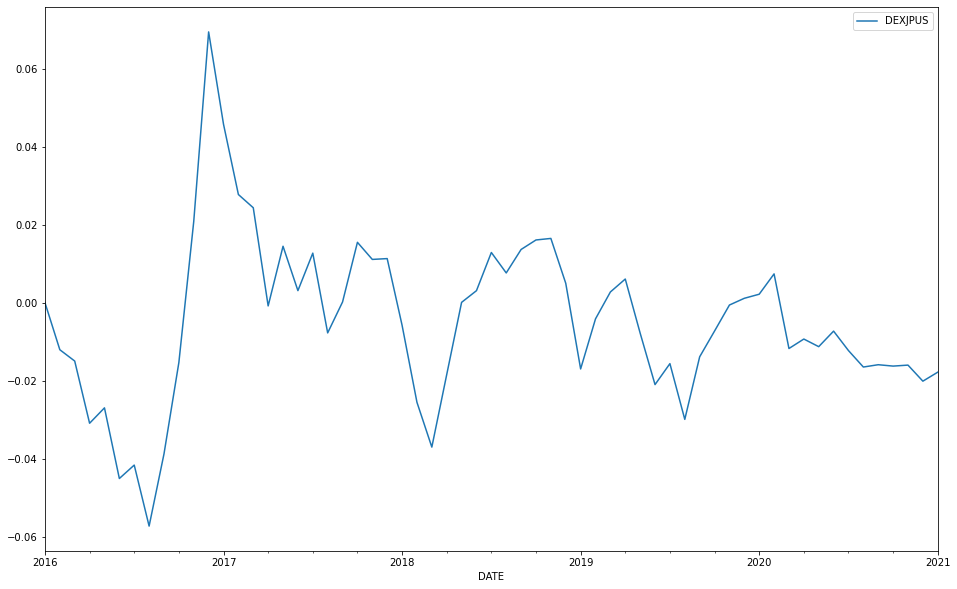

In [62]:
yLogewm = log_y - exp_roll_mean
yLogewm.plot(figsize=(16,10));

In [64]:
ydiff = yLogRollMean.diff(periods=12)
ydiff.dropna(inplace=True)
ydiff.head()

,DEXJPUS
DATE,
2017-07-01,0.055917
2017-08-01,0.049283
2017-09-01,0.034947
2017-10-01,0.022152
2017-11-01,-0.025496


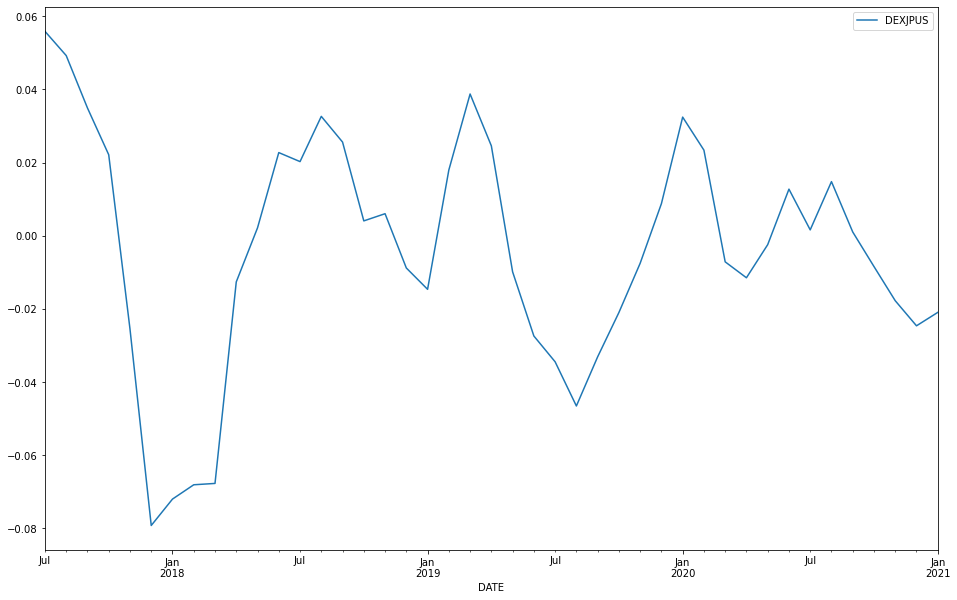

In [65]:
ydiff.plot(figsize=(16,10));

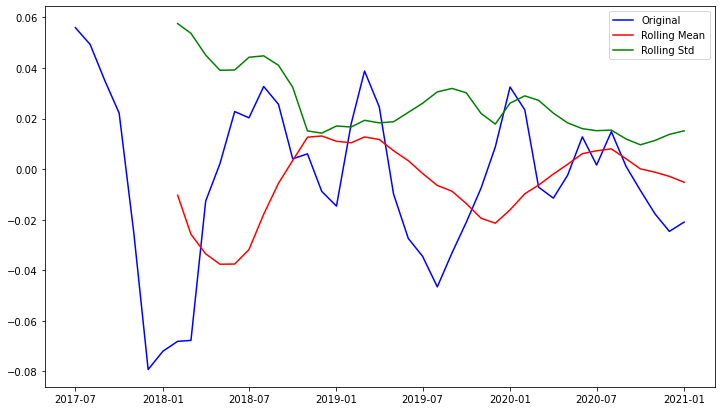

Results of Dickey-Fuller test: 



Test Statistic                 -5.224645
p-value                         0.000008
#Lags Used                     10.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64

In [66]:
stationarity_check(ydiff)

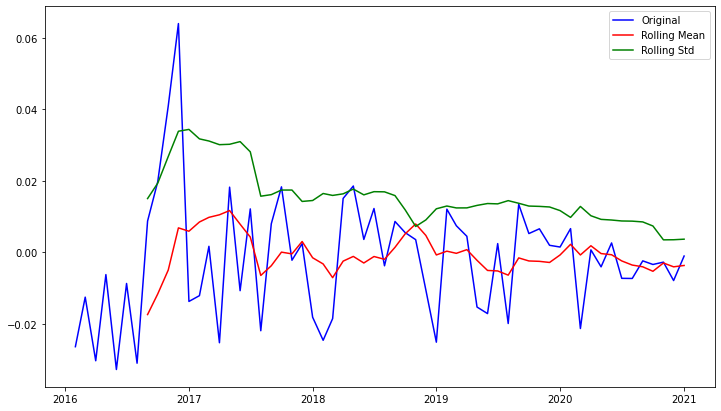

Results of Dickey-Fuller test: 



Test Statistic                 -2.749870
p-value                         0.065799
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64

In [67]:
yshift = log_y - log_y.shift(1)
yshift.dropna(inplace=True)
stationarity_check(yshift)

In [69]:
from statsmodels.tsa.stattools import kpss

#a. ADF Test
adf_test_2 = adfuller(yshift)
print('stat=%.3f, p=%.3f' % adf_test_2[0:2])
if adf_test_2[1] > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')
#b. KPSS Test
kpss_test_2 = kpss(yshift, nlags='auto')
print('stat=%.3f, p=%.3f' % kpss_test_2[0:2])
if kpss_test_2[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably not Stationary')

stat=-2.750, p=0.066
Probably not Stationary
stat=0.064, p=0.100
Probably Stationary


In [71]:
adf_test_2 = adfuller(ydiff)
print('stat=%.3f, p=%.3f' % adf_test_2[0:2])
if adf_test_2[1] > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')
#b. KPSS Test
kpss_test_2 = kpss(ydiff, nlags='auto')
print('stat=%.3f, p=%.3f' % kpss_test_2[0:2])
if kpss_test_2[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably not Stationary')

stat=-5.225, p=0.000
Probably Stationary
stat=0.046, p=0.100
Probably Stationary


In [72]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

diffyearly = set()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ydiff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            diffyearly.add((param, param_seasonal, results.aic))
        except:
            continue
            
sorted_diffyearly = sorted(diffyearly, key=lambda x: x[2])
sorted_diffyearly[0], sorted_diffyearly[-1]

(((1, 0, 1), (0, 0, 0, 12), -212.09347133841257),
 ((1, 0, 1), (0, 0, 1, 12), 1548.535402151347))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6368      0.119      5.355      0.000       0.404       0.870
ma.L1          0.4958      0.164      3.021      0.003       0.174       0.817
sigma2         0.0003   6.84e-05      4.160      0.000       0.000       0.000


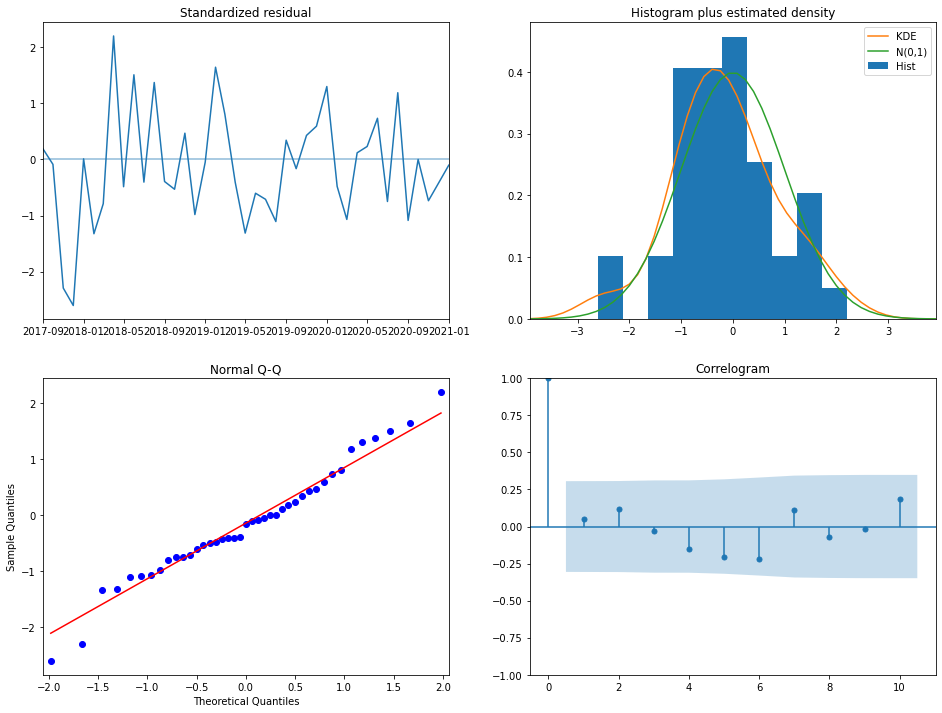

In [73]:
mod = sm.tsa.statespace.SARIMAX(ydiff,
                                order=sorted_diffyearly[0][0],
                                seasonal_order=sorted_diffyearly[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16,12));

In [75]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                DEXJPUS   No. Observations:                   43
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 109.047
Date:                Sun, 24 Jan 2021   AIC                           -212.093
Time:                        20:08:06   BIC                           -206.953
Sample:                    07-01-2017   HQIC                          -210.222
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6368      0.119      5.355      0.000       0.404       0.870
ma.L1          0.4958      0.164      3.021      0.003       0.174       0.817
sigma2         0.0003   6.84e-05      4.160      0.0

7 iterations remaining...
6 iterations remaining...
5 iterations remaining...
4 iterations remaining...
3 iterations remaining...
2 iterations remaining...
1 iterations remaining...
0 iterations remaining...
                                     SARIMAX Results                                      
Dep. Variable:                            DEXJPUS   No. Observations:                   43
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  41.790
Date:                            Sun, 24 Jan 2021   AIC                            -73.580
Time:                                    20:20:45   BIC                            -69.717
Sample:                                07-01-2017   HQIC                           -73.382
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.0

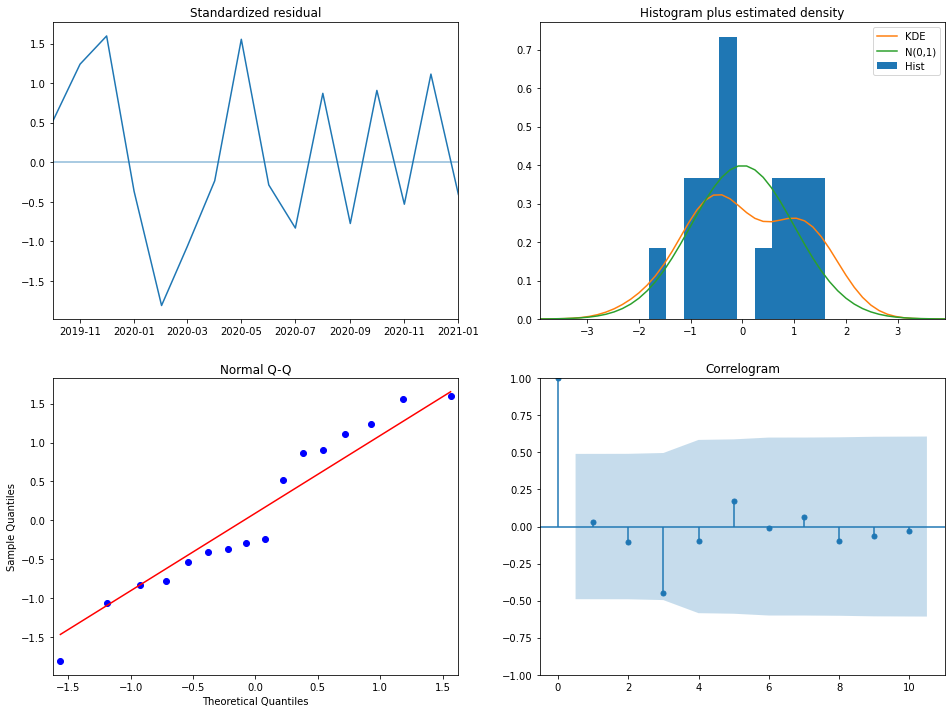

In [80]:
p = range(1, 3)
d = range(1, 3)
q = range(1, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

diffyearly = set()
for n, param in enumerate(pdq):
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ydiff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            diffyearly.add((param, param_seasonal, results.aic))
        except:
            continue
    print(f'{len(pdq) - (n+1)} iterations remaining...')
            
sorted_diffyearly = sorted(diffyearly, key=lambda x: x[2])

mod = sm.tsa.statespace.SARIMAX(ydiff,
                                order=sorted_diffyearly[0][0],
                                seasonal_order=sorted_diffyearly[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())
results.plot_diagnostics(figsize=(16,12));

7 iterations remaining...
6 iterations remaining...
5 iterations remaining...
4 iterations remaining...
3 iterations remaining...
2 iterations remaining...
1 iterations remaining...
0 iterations remaining...
                               SARIMAX Results                                
Dep. Variable:                DEXJPUS   No. Observations:                   43
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 109.047
Date:                Sun, 24 Jan 2021   AIC                           -212.093
Time:                        20:35:20   BIC                           -206.953
Sample:                    07-01-2017   HQIC                          -210.222
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

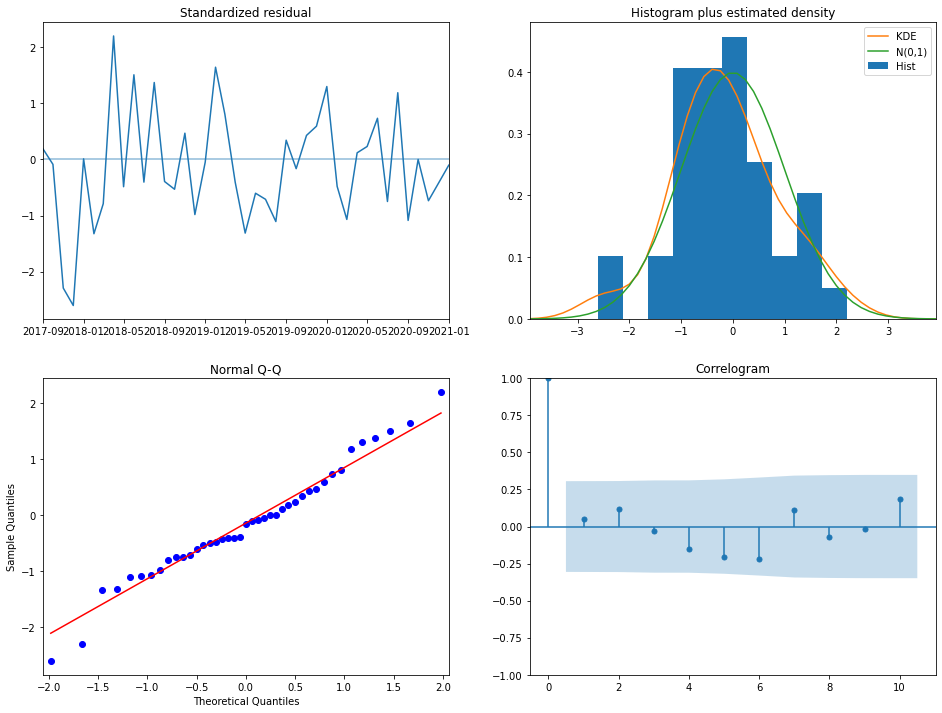

In [91]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

diffyearly = set()
for n, param in enumerate(pdq):
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ydiff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            diffyearly.add((param, param_seasonal, results.aic))
        except:
            continue
    print(f'{len(pdq) - (n+1)} iterations remaining...')
            
sorted_diffyearly = sorted(diffyearly, key=lambda x: x[2])

mod = sm.tsa.statespace.SARIMAX(ydiff,
                                order=sorted_diffyearly[0][0],
                                seasonal_order=sorted_diffyearly[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())
results.plot_diagnostics(figsize=(16,12));

In [103]:
model_arima = ARIMA(ydiff, (1,0,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                DEXJPUS   No. Observations:                   43
Model:                     ARMA(1, 1)   Log Likelihood                 113.151
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sun, 24 Jan 2021   AIC                           -218.303
Time:                        20:41:17   BIC                           -211.258
Sample:                    07-01-2017   HQIC                          -215.705
                         - 01-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0017      0.011     -0.146      0.884      -0.024       0.021
ar.L1.DEXJPUS     0.6751      0.129      5.230      0.000       0.422       0.928
ma.L1.DEXJPUS     0.5002      0.142     

In [104]:
pred = model_arima_fit.forecast(12, alpha=0.05)[0]
print(pred)



[-0.0150692  -0.01071838 -0.00778098 -0.00579781 -0.0044589  -0.00355495
 -0.00294466 -0.00253262 -0.00225444 -0.00206663 -0.00193984 -0.00185423]


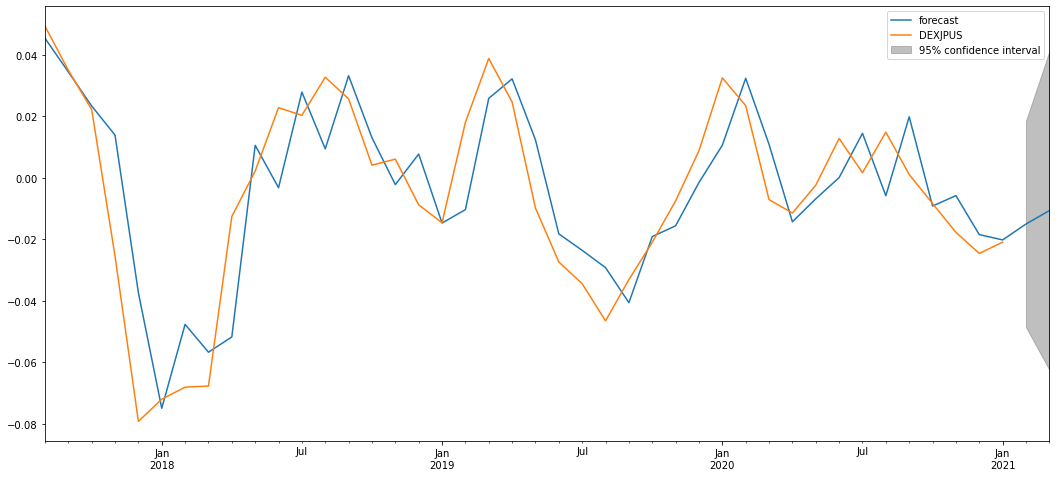

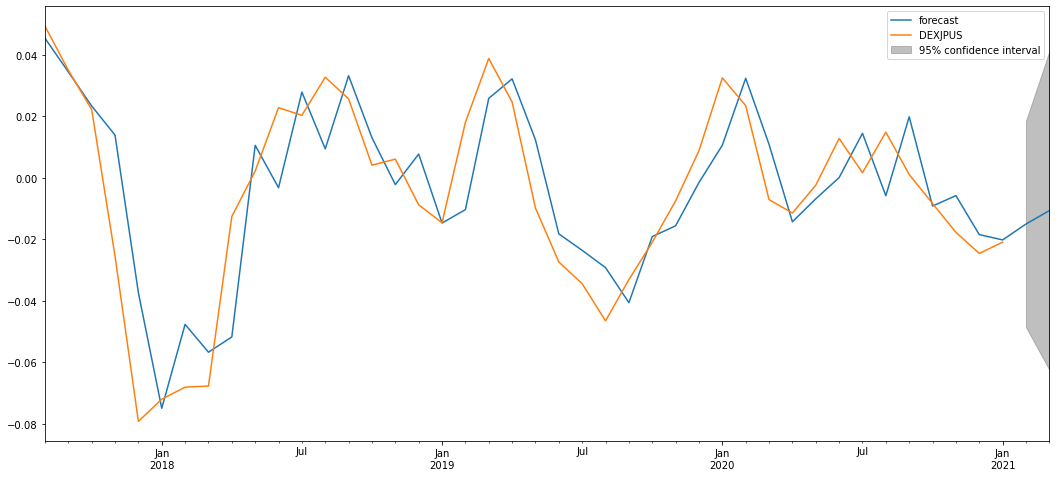

In [123]:
model_arima_fit.plot_predict(1,44)

In [107]:
p = results.forecast(12, alpha=0.05)[0]
print(p)

-0.014211648567075737


In [109]:
results.forecast(12)

2021-02-01   -0.014212
2021-03-01   -0.009050
2021-04-01   -0.005763
2021-05-01   -0.003670
2021-06-01   -0.002337
2021-07-01   -0.001488
2021-08-01   -0.000948
2021-09-01   -0.000603
2021-10-01   -0.000384
2021-11-01   -0.000245
2021-12-01   -0.000156
2022-01-01   -0.000099
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

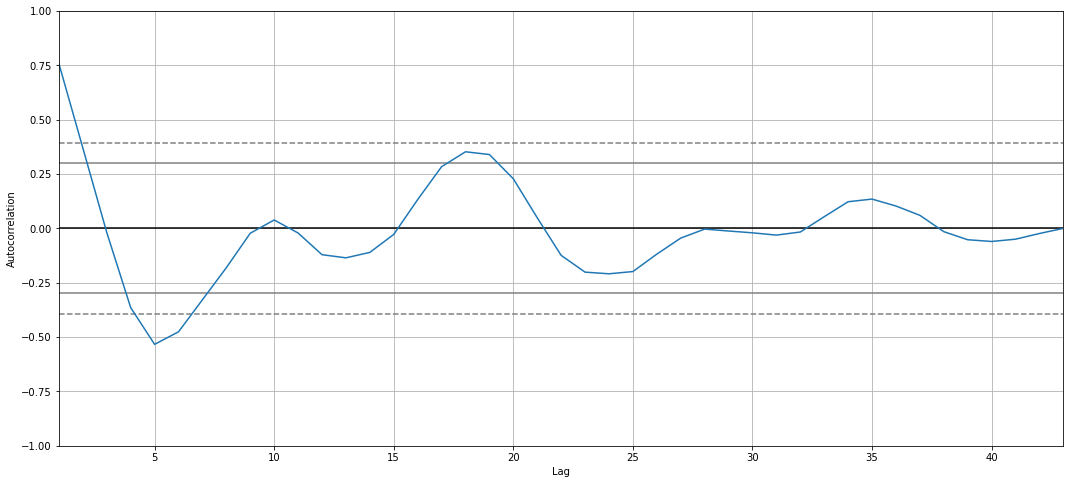

In [124]:
pd.plotting.autocorrelation_plot(ydiff)

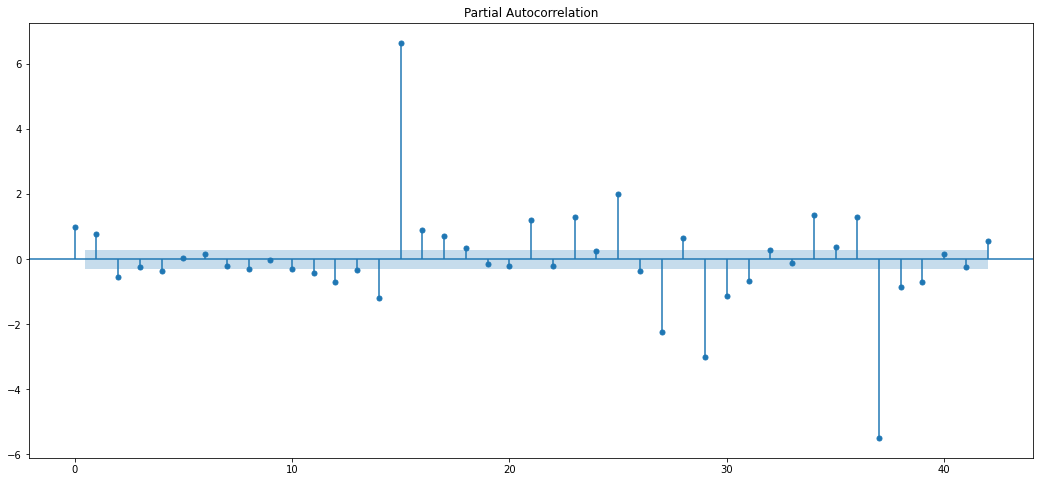

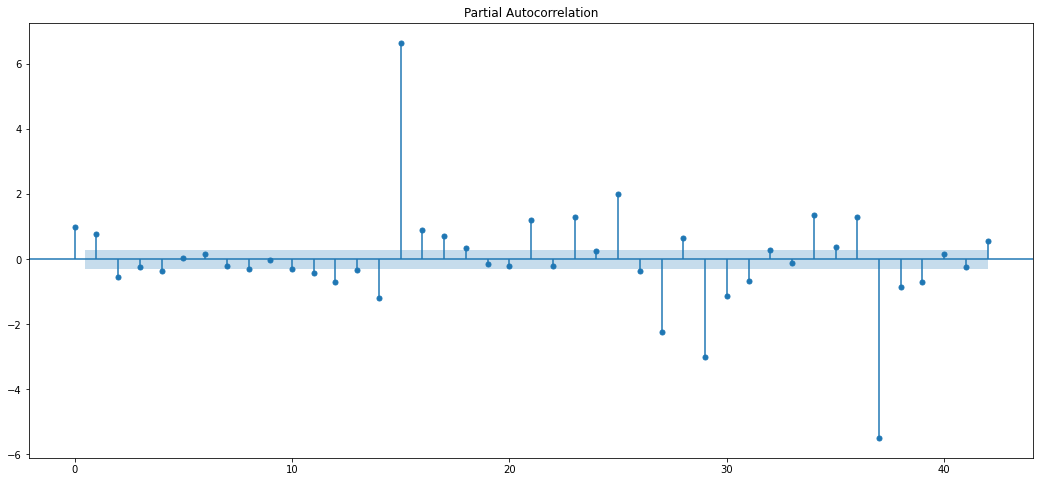

In [129]:
plot_pacf(ydiff, lags=50)

notes 1/24
- use ARMA models lab notebook as guide
    - get lowest AIC
- use as references
    - digitalocean
    - medium blog
- start new notebook to write out detailed steps for each section